In [1]:
!pwd

/Users/gbort/Applications/kaggle/integer-sequence-learning


In [2]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import check_output

def stoarray(data = [], sep = ','):
    return data.map(lambda x: np.array(x.split(sep), dtype=float))

# load the data
colna = ['id', 'seq']
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
test.columns = colna
train.columns = colna
train['seq'], test['seq'] = stoarray(train['seq']), stoarray(test['seq']) 

       x
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
8    9.0
9   10.0
10  11.0
0 / 4 processed 
       x
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
8    9.0
9   10.0
10  11.0
11  12.0
12  13.0
13  14.0
14  15.0
15  16.0
16  17.0
17  18.0
18  19.0
19  20.0
20  21.0
21  22.0
22  23.0
23  24.0
24  25.0
25  26.0
26  27.0
       x
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
8    9.0
9   10.0
10  11.0
11  12.0
12  13.0
13  14.0
14  15.0
15  16.0
16  17.0
17  18.0
18  19.0
19  20.0
20  21.0
21  22.0
22  23.0
23  24.0
24  25.0
25  26.0
26  27.0
27  28.0
28  29.0
29  30.0
30  31.0
31  32.0
32  33.0
33  34.0
34  35.0
35  36.0
36  37.0
37  38.0
38  39.0
39  40.0
40  41.0
41  42.0
42  43.0
43  44.0
44  45.0
45  46.0
46  47.0
47  48.0
48  49.0
49  50.0
50  51.0
       x
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
8    9.0
9   10.0
10  11.0
11  12.0
12  13.0
13  14.0
14  15.0
15  16.0
16

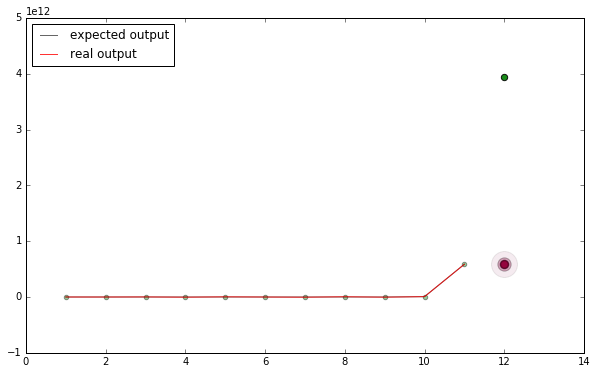

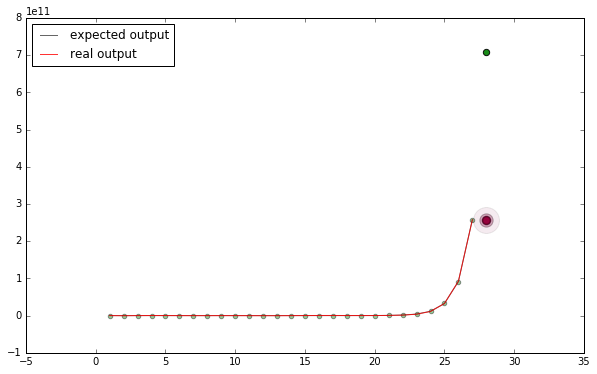

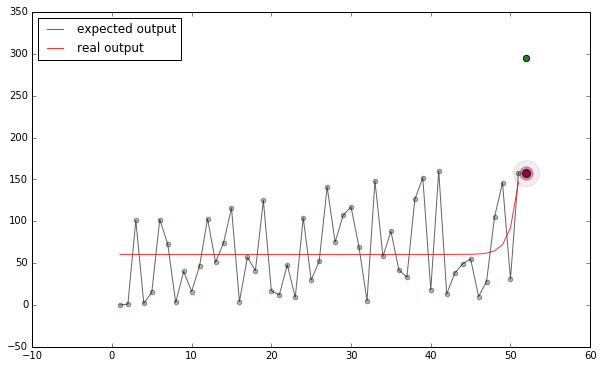

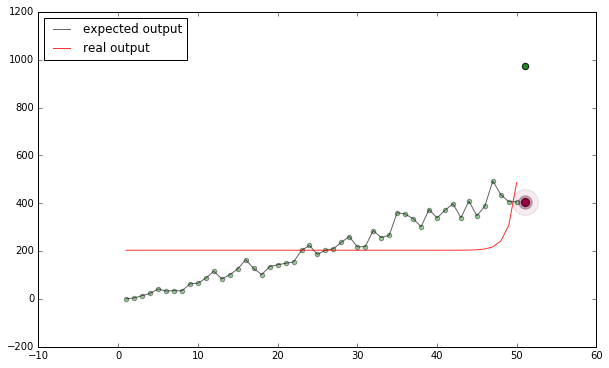

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

def addpolynomialterms(subX, x):
    subX['x2'] = x**2
    subX['x3'] = x**3
    subX['x4'] = x**.5
    subX['x5'] = np.sin(x)
    subX['x6'] = np.cos(x)
    subX['x7'] = np.exp(x)
    subX['x8'] = np.log(x)


sample = test[:4]
xdebug = True

output = []
for s in range(len(sample['id'])):
    expected  = sample['seq'][s][-1:]
    y         = sample['seq'][s]
    x         = np.linspace(1, len(y),len(y))
    regresor  = linear_model.LinearRegression()
    subX      = pd.DataFrame({'x': x})
    print(subX)
    addpolynomialterms(subX, x)
    regresor.fit(subX.as_matrix(), y)
    predict   = regresor.predict(subX.as_matrix())

    x1         = np.linspace(len(y)+1, len(y)+2, 1)
    subX1      = pd.DataFrame({'x':x1})
    addpolynomialterms(subX1, x1)
    predict1   = regresor.predict(subX1.as_matrix())
    output.append([sample['id'][s], predict1[0]])
    
    if xdebug:
        plt.figure(figsize=(10,6))
        plt.scatter(x, y, s=20, c='green', alpha=0.4)
        for j in range(5):
            plt.scatter(x1[0], expected, s=50+5**j, c='darkblue', alpha=0.52-0.12*j)
            plt.scatter(x1[0], expected, s=50+5**j, c='red', alpha=0.52-0.12*j)
        plt.plot(x, y, c='black', alpha=0.6, label='expected output')
        plt.plot(x, predict, c='red', alpha=0.8, linewidth=1., label='real output')
        plt.scatter(x1, predict1, s=40, c='green', alpha=0.9)
        plt.legend(loc='upper left')
        plt.savefig('linear03.png')
        
    if s%1000==0:
        print('%d / %d processed ' % (s, len(sample['id'])))

pd.DataFrame(output).to_csv("submission1.csv", header=["Id", "Last"], index=False, index_label=False)